In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Plot settings
plt.rcParams['figure.figsize'] = (20, 5) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams.update({'font.size': 22})

-2.632833332224842
-2.852982182361363
-3.082537384009943
-1.9822114391393695
peak_idx = [ 48  89 131 171]
[ 48  89 131 171]


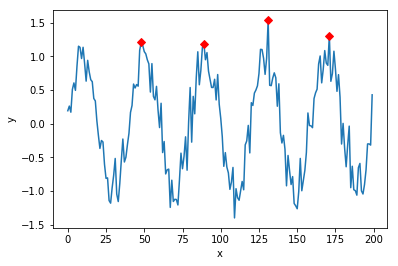

In [183]:
def detect_peaks(x, num_train, num_guard, rate_fa, method = 'CA-CFAR'):
    """
    Detect peaks with CFAR algorithm.
    
    num_train: Number of training cells.
    num_guard: Number of guard cells.
    rate_fa: False alarm rate. 
    """
    num_cells = x.size
    num_train_half = round(num_train / 2)
    num_guard_half = round(num_guard / 2)
    num_side = num_train_half + num_guard_half
    if method == 'SO-CFAR':
        print('method = SO-CFAR')
    elif method == 'OS-CFAR' : 
        print('method = SO-CFAR')
    else:     
        alpha = num_train*(rate_fa**(-1/num_train) - 1) # threshold factor
   
    peak_idx = []
    for i in range(num_side, num_cells - num_side):
        
        if i != i-num_side+np.argmax(x[i-num_side:i+num_side+1]): 
            continue
        
        sum1 = np.sum(x[i-num_side:i+num_side+1])
        sum2 = np.sum(x[i-num_guard_half:i+num_guard_half+1]) 
        p_noise = (sum1 - sum2) / num_train 
        threshold = alpha * p_noise
        print(threshold)
        if x[i] > threshold: 
            peak_idx.append(i)
    
    peak_idx = np.array(peak_idx, dtype=int)
    
    return peak_idx

y = np.sin(2*np.pi*5*np.linspace(0, 1, 200)) + np.random.randn(200)/5
x = np.arange(y.size)

# Detect peaks
peak_idx = detect_peaks(y, num_train=30, num_guard=10, rate_fa=1e-3)
print("peak_idx =", peak_idx)

plt.plot(x, y)
plt.plot(x[peak_idx], y[peak_idx], 'rD')
plt.xlabel('x')
plt.ylabel('y')
print(peak_idx) 
plt.savefig('CFAR_ERRO1.png', dpi=400)

20
peak_idx = [ 50  90 129 169]


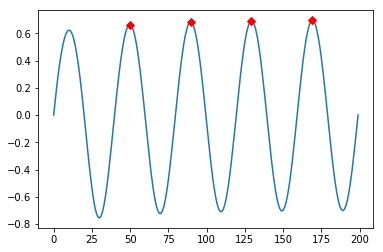

In [176]:
y1 = np.sin(2*np.pi*5*np.linspace(0, 1, 200))
# z = np.random.randn(200)
# z = np.zeros(200)+1
z1=np.arange(0,20,0.1)
x1 =0.7*np.exp(- 0.2 * z)
# x[75]=-0.7
z1= y1*x1
plt.plot(z1)
peak_idx = detect_peaks(z1, num_train=20, num_guard=20, rate_fa=1e-1)
print("peak_idx =", peak_idx)

# plt.plot(x1, y1)
plt.plot(peak_idx,z1[peak_idx], 'rD')
# plt.xlabel('x')
# plt.ylabel('y')
# print(peak_idx) 
# plt.savefig('CFAR_ERRO1.png', dpi=400)

In [121]:
a=[     -56.46602472,  -54.78142675,  -49.52296475,  -45.85376866,-38.36489775,  -40.62389825,  -28.35218707,   -1.5301711,
        -17.75780056,  -28.6044828 ,   -0.49491889,  -20.72919894, -35.97933601,  -43.78466386,  -44.63004587,  -49.35549142,
        -50.62979713,  -56.52496663,  -58.51351138,  -60.85606543, -62.18391716,  -63.90161343,  -64.91691061,  -66.15157045,        -67.58431684,  -68.98071787,  -69.46816775,  -70.32466602,
        -72.67994086,  -72.47931654,  -73.25337723,  -74.91434894, -74.28175945,  -72.30536188,  -78.44842288,  -79.74146411,
        -83.7382662 ,  -75.75142602,  -78.41344544,  -82.2153047 , -79.90027218,  -81.05241293,  -72.90123756,  -72.48086817,
        -76.89293672,  -65.98446998,  -76.50433363,  -80.57357133, -75.69234815,  -85.24730722,  -85.37098473,  -83.70769187,
        -82.49474023,  -83.35108553,  -80.13009558,  -87.34006308, -86.62265604,  -84.80060653,  -87.1442698 ,  -86.90922181,
        -83.95418442,  -88.66917961,  -89.10383516,  -88.06266329, -88.87023309,  -89.00120088,  -88.19686531,  -89.72096535,
        -90.43962922,  -88.61045401,  -89.25599161,  -89.44584675, -88.98510078,  -89.73321087,  -88.42386668,  -96.46326532,
        -94.5363749 ,  -94.35068164,  -87.66965483,  -88.59428838, -82.00408225,  -93.8402764 ,  -92.03560768,  -87.05779907,
        -96.79838851,  -94.46019407,  -91.80995227,  -96.30532507, -95.93821455,  -98.07752099,  -92.66884935,  -93.80846612,
        -96.92344251,  -94.8362535 ,  -95.64860631,  -93.39818451, -94.35337545,  -94.82826649,  -94.59651309,  -94.78173188,
        -95.86895411,  -93.19223463,  -94.31761694,  -93.99964575, -100.29649471,  -95.74851268,  -96.46059318,  -95.06933298,
        -95.8715642 ,  -96.44003054,  -95.17753474,  -95.09943819, -92.65721538,  -96.19777459,  -95.52075272,  -92.50795281,
        -99.06997886,  -98.21328486,  -97.94386122,  -96.41895045, -96.82162117,  -97.45286299,  -96.66318527,  -97.50925189,
        -98.14103751,  -96.23671289,  -96.27817726,  -96.45340113]

peak_idx = [ 10  45  80 101 115]


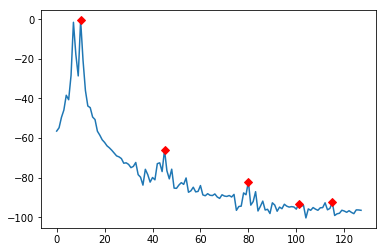

In [180]:
plt.plot(a)
a1 =np.asarray(a)
peak_idx = detect_peaks(a1, num_train=10, num_guard=10, rate_fa=1e-4)
print("peak_idx =", peak_idx)
plt.plot(peak_idx,a1[peak_idx], 'rD')

method = CA-CFAR


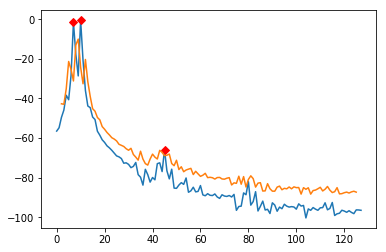

In [323]:
a=[     -56.46602472,  -54.78142675,  -49.52296475,  -45.85376866,-38.36489775,  -40.62389825,  -28.35218707,   -1.5301711,
        -17.75780056,  -28.6044828 ,   -0.49491889,  -20.72919894, -35.97933601,  -43.78466386,  -44.63004587,  -49.35549142,
        -50.62979713,  -56.52496663,  -58.51351138,  -60.85606543, -62.18391716,  -63.90161343,  -64.91691061,  -66.15157045,        -67.58431684,  -68.98071787,  -69.46816775,  -70.32466602,
        -72.67994086,  -72.47931654,  -73.25337723,  -74.91434894, -74.28175945,  -72.30536188,  -78.44842288,  -79.74146411,
        -83.7382662 ,  -75.75142602,  -78.41344544,  -82.2153047 , -79.90027218,  -81.05241293,  -72.90123756,  -72.48086817,
        -76.89293672,  -65.98446998,  -76.50433363,  -80.57357133, -75.69234815,  -85.24730722,  -85.37098473,  -83.70769187,
        -82.49474023,  -83.35108553,  -80.13009558,  -87.34006308, -86.62265604,  -84.80060653,  -87.1442698 ,  -86.90922181,
        -83.95418442,  -88.66917961,  -89.10383516,  -88.06266329, -88.87023309,  -89.00120088,  -88.19686531,  -89.72096535,
        -90.43962922,  -88.61045401,  -89.25599161,  -89.44584675, -88.98510078,  -89.73321087,  -88.42386668,  -96.46326532,
        -94.5363749 ,  -94.35068164,  -87.66965483,  -88.59428838, -82.00408225,  -93.8402764 ,  -92.03560768,  -87.05779907,
        -96.79838851,  -94.46019407,  -91.80995227,  -96.30532507, -95.93821455,  -98.07752099,  -92.66884935,  -93.80846612,
        -96.92344251,  -94.8362535 ,  -95.64860631,  -93.39818451, -94.35337545,  -94.82826649,  -94.59651309,  -94.78173188,
        -95.86895411,  -93.19223463,  -94.31761694,  -93.99964575, -100.29649471,  -95.74851268,  -96.46059318,  -95.06933298,
        -95.8715642 ,  -96.44003054,  -95.17753474,  -95.09943819, -92.65721538,  -96.19777459,  -95.52075272,  -92.50795281,
        -99.06997886,  -98.21328486,  -97.94386122,  -96.41895045, -96.82162117,  -97.45286299,  -96.66318527,  -97.50925189,
        -98.14103751,  -96.23671289,  -96.27817726,  -96.45340113]

def detect_peaks(x, num_train, num_guard, rate_fa, method = 'CA-CFAR'):
    """
    Detect peaks with CFAR algorithm.
    
    num_train: Number of training cells.
    num_guard: Number of guard cells.
    rate_fa: False alarm rate. 
    """
    num_cells = x.size
    num_train_half = round(num_train / 2)
    num_guard_half = round(num_guard / 2)
    num_side = num_train_half + num_guard_half
    if method == 'SO-CFAR':
        print('method = SO-CFAR')
    elif method == 'OS-CFAR' : 
        print('method = SO-CFAR')
    else:     
        alpha = num_train*(rate_fa**(-1/num_train) - 1)*0.05 # threshold factor
        
        print('method = CA-CFAR')
   
    peak_idx = []
    threshold_idx =[]
    threshold_idx_i=[]
    for i in range(num_side, num_cells - num_side):
        
        
        sum1 = np.sum(x[i-num_side:i+num_side+1])
        sum2 = np.sum(x[i-num_guard_half:i+num_guard_half+1]) 
        p_noise = (sum1 - sum2) / num_train 
        threshold =  alpha*p_noise
        threshold_idx.append(threshold)
        threshold_idx_i.append(i)
        
        if i != i-num_side+np.argmax(x[i-num_side:i+num_side+1]): 
            continue      
        

        if x[i] > threshold: 
            peak_idx.append(i)
    
    peak_idx = np.array(peak_idx, dtype=int)
    
    return peak_idx,threshold_idx,threshold_idx_i


plt.plot(a)
a1 =np.asarray(a)
peak_idx,threshold_idx,threshold_idx_i = detect_peaks(a1, num_train=2, num_guard=2, rate_fa=1e-2)
# print("peak_idx =", peak_idx)
plt.plot(peak_idx,a1[peak_idx], 'rD')
plt.plot(threshold_idx_i,threshold_idx)
# plt.savefig('CFAR_ERRO2.png', dpi=400)

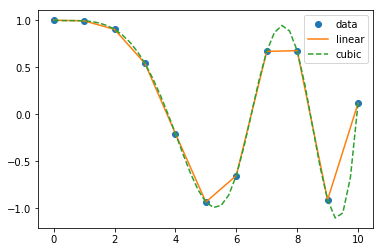

In [294]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt


x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')
xnew = np.linspace(0, 10, num=41, endpoint=True)

plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

method = CA-CFAR


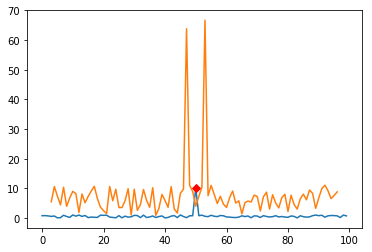

In [347]:
from math import log10

def detect_peaks(x, num_train, num_guard, rate_fa, method = 'CA-CFAR'):
    """
    Detect peaks with CFAR algorithm.
    
    num_train: Number of training cells.
    num_guard: Number of guard cells.
    rate_fa: False alarm rate. 
    """
    num_cells = x.size
    num_train_half = round(num_train / 2)
    num_guard_half = round(num_guard / 2)
    num_side = num_train_half + num_guard_half
    if method == 'SO-CFAR':
        print('method = SO-CFAR')
    elif method == 'OS-CFAR' : 
        print('method = SO-CFAR')
    else:     
        alpha = num_train*(rate_fa**(-1/num_train) - 1)*0.02 # threshold factor
        
        print('method = CA-CFAR')
   
    peak_idx = []
    threshold_idx =[]
    threshold_idx_i=[]
    for i in range(num_side, num_cells - num_side):
        
        
        sum1 = np.sum(x[i-num_side:i+num_side+1])
        sum2 = np.sum(x[i-num_guard_half:i+num_guard_half+1]) 
        p_noise = (sum1 - sum2) / num_train 
        threshold =  alpha*p_noise
        threshold_idx.append(threshold)
        threshold_idx_i.append(i)
        
        if i != i-num_side+np.argmax(x[i-num_side:i+num_side+1]): 
            continue      
        

        if x[i] > threshold: 
            peak_idx.append(i)
    
    peak_idx = np.array(peak_idx, dtype=int)
    
    return peak_idx,threshold_idx,threshold_idx_i



t= np.random.random(100)
t[50] =10
sum_t = np.sum(t)
SNR = 10*math.log10(t[50]/(sum_t/100))

plt.plot(t)

peak_idx,threshold_idx,threshold_idx_i = detect_peaks(t, num_train=2, num_guard=4, rate_fa=1e-5)
plt.plot(peak_idx,t[peak_idx], 'rD')
plt.plot(threshold_idx_i,threshold_idx)

mean_t=1.10 SNR =19.01


(0, 100)

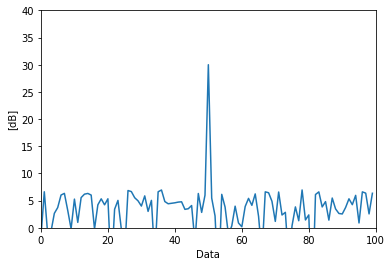

In [407]:
from math import log10

t= np.random.random(100)*5
t[50] =1000
sum_t = np.sum(t)
mean_t =np.mean(t)

SNR_LOG=10*log10(t[50])-10*log10(mean_t)
print('mean_t=%.2f'%log10(mean_t),'SNR =%.2f'%SNR_LOG)


SNR = 10*math.log10(t[50]/(sum_t/100))

for i in range(0,100):
     t[i]= 10*log10(t[i])
  
plt.plot(t)
plt.xlabel('Data')
plt.ylabel('[dB]')
plt.ylim(0,40)
plt.xlim(0,100)



SNR =19.04
method = CA-CFAR


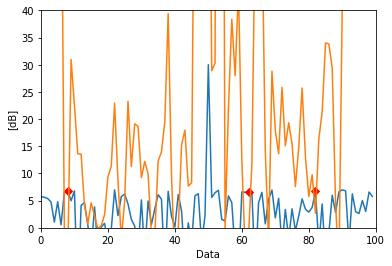

In [462]:

def detect_peaks(x, num_train, num_guard, rate_fa, method = 'CA-CFAR'):
    """
    Detect peaks with CFAR algorithm.
    
    num_train: Number of training cells.
    num_guard: Number of guard cells.
    rate_fa: False alarm rate. 
    """
    num_cells = x.size
    num_train_half = round(num_train / 2)
    num_guard_half = round(num_guard / 2)
    num_side = num_train_half + num_guard_half
    if method == 'SO-CFAR':
        print('method = SO-CFAR')
    elif method == 'OS-CFAR' : 
        print('method = SO-CFAR')
    else:     
        alpha = num_train*(rate_fa**(-1/num_train) - 1)*0.02 # threshold factor 
        
        print('method = CA-CFAR')
   
    peak_idx = []
    threshold_idx =[]
    threshold_idx_i=[]
    for i in range(num_side, num_cells - num_side):
        
        
        sum1 = np.sum(x[i-num_side:i+num_side+1])
        sum2 = np.sum(x[i-num_guard_half:i+num_guard_half+1]) 
        p_noise = (sum1 - sum2) / num_train
        threshold =  (sum1/num_side)*alpha*p_noise
        threshold_idx.append(threshold)
        threshold_idx_i.append(i)
        
        if i != i-num_side+np.argmax(x[i-num_side:i+num_side+1]): 
            continue      
        

        if x[i] > threshold: 
            peak_idx.append(i)
    
    peak_idx = np.array(peak_idx, dtype=int)
    
    return peak_idx,threshold_idx,threshold_idx_i

t= np.random.random(100)*5
t[50] =1000
sum_t = np.sum(t)
mean_t =np.mean(t)
SNR_LOG=10*log10(t[50])-10*log10(mean_t)
print('SNR =%.2f'%SNR_LOG)


for i in range(0,100):
     t[i]= 10*log10(t[i])



plt.plot(t)
plt.xlabel('Data')
plt.ylabel('[dB]')
plt.ylim(0,40)
plt.xlim(0,100)


peak_idx,threshold_idx,threshold_idx_i = detect_peaks(t, num_train=4, num_guard=4, rate_fa=1e-5)
plt.plot(peak_idx,t[peak_idx], 'rD')
plt.plot(threshold_idx_i,threshold_idx)


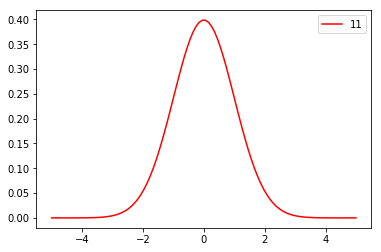

In [476]:
x = np.linspace(-5, 5, num=100, endpoint=True)

y1= (1/(2*np.pi)**0.5)*np.exp(-0.5*x**2)


y = 3*x**2

plt.plot(x,y1,color= 'red',label ='11')
plt.legend(loc='best')
plt.show()

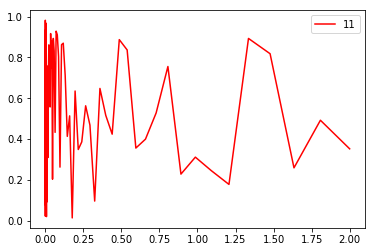

In [482]:
x = np.linspace(0, 5, num=100, endpoint=True)
t= np.random.random(100)


y2= (1/(2*np.pi)**0.5)*np.exp(-0.5*x**2)
y1 = 3*x**2
y = 1/0.5*np.exp(-x/0.5)

plt.plot(y,t,color= 'red',label ='11')
plt.legend(loc='best')
plt.show()

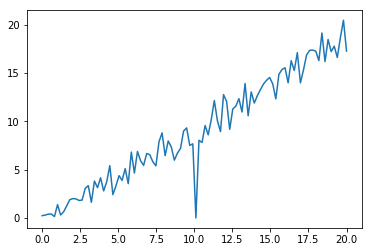

In [13]:
x= np.random.random(100)*5
x[50] =1000
# x =np.linspace(0, 100, num=100, endpoint=True)
SNR = np.linspace(0, 20, num=100, endpoint=True)
PDF_SNR = (1/1+SNR)*np.exp(-x/(1+SNR)) 
plt.plot(SNR,PDF_SNR)

plt.show()

In [3]:
L =24
T =3.5
S =200
PDF =(1+2*T/(L*(1+S)))**-L/2-(2+2*T/((1+S)))**-L/2
PDF

0.48289895559673246

In [4]:
L =24
T =3.5
S =200
PDF =(1 +T/(L*(1+S)))**-L
plt.plot(PDF)

0.9827439985455004